In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('car5_train.csv')
df_test = pd.read_csv('car5_test.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)

In [ ]:
df_train.head(1)

,typeofoil,displacement,empty_vehicle_weight,downtown_fuel_efficiency,highway_fuel_efficiency,fuel_efficiency,typeofcar,CO2,grade
0,0,1580,1425,18.1,16.6,17.4,0,92,1


In [ ]:
df_train['grade']

0      1
1      2
2      5
3      5
4      3
      ..
196    5
197    2
198    4
199    3
200    2
Name: grade, Length: 201, dtype: int64

In [ ]:
df_test.head(1)

,typeofoil,displacement,empty_vehicle_weight,downtown_fuel_efficiency,highway_fuel_efficiency,fuel_efficiency,typeofcar,CO2
0,0,1580,1395,20.1,18.4,19.3,0,82


In [ ]:
X_train = df_train[['typeofoil', 'displacement', 'empty_vehicle_weight', 'downtown_fuel_efficiency', 'highway_fuel_efficiency', 'fuel_efficiency', 'typeofcar']]
y_train = df_train['grade']

X_test = df_test[['typeofoil', 'displacement', 'empty_vehicle_weight', 'downtown_fuel_efficiency', 'highway_fuel_efficiency', 'fuel_efficiency', 'typeofcar']]

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

<Axes: >

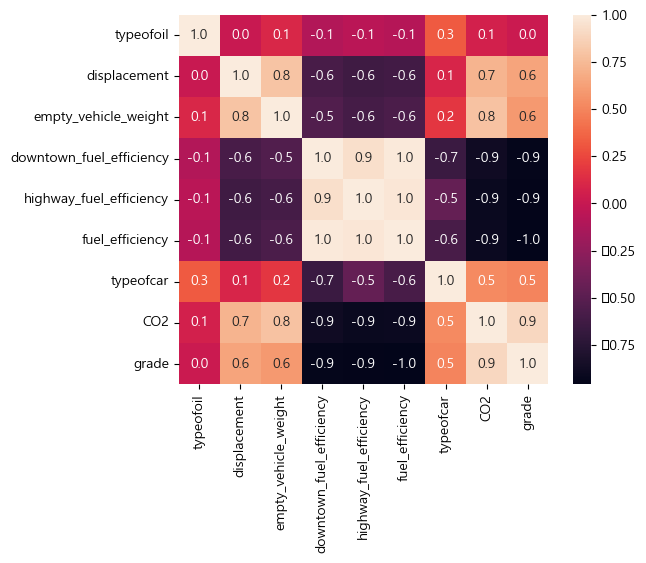

In [ ]:
sns.heatmap(df_train.corr(), square=True, annot=True, fmt='.1f')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
df_test['grade'] =np.round(y_pred).astype(int)

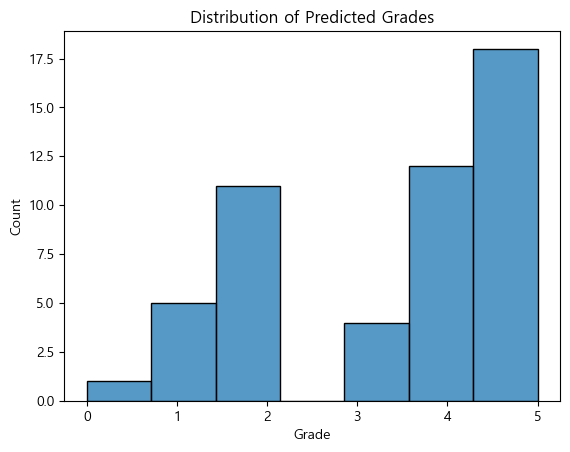

In [ ]:
# plt.figure(figsize=(8, 6))
p1 = sns.histplot(x=df_test['grade'])
plt.title('Distribution of Predicted Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

## 상관 관계 높은 요소 3개 빼보기

In [ ]:
df_train = pd.read_csv('car5_train.csv')
df_test = pd.read_csv('car5_test.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)

In [ ]:
X_train = df_train[['typeofoil', 'displacement', 'empty_vehicle_weight', 'typeofcar']]
y_train = df_train['grade']

X_test = df_test[['typeofoil', 'displacement', 'empty_vehicle_weight', 'typeofcar']]

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
df_test['grade'] =np.round(y_pred).astype(int)

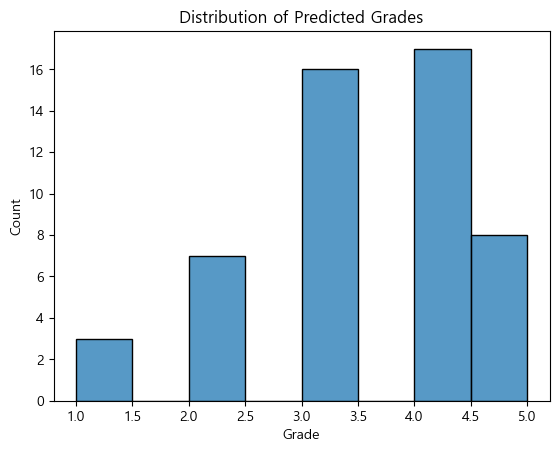

In [ ]:
# plt.figure(figsize=(8, 6))
p2 = sns.histplot(x=df_test['grade'])
plt.title('Distribution of Predicted Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

### 결과가 많이 달라짐

## 상관 관계 없는 요소 하나 빼보기

In [ ]:
df_train = pd.read_csv('car5_train.csv')
df_test = pd.read_csv('car5_test.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)

In [ ]:
X_train = df_train[['displacement', 'empty_vehicle_weight', 'downtown_fuel_efficiency', 'highway_fuel_efficiency', 'fuel_efficiency', 'typeofcar']]
y_train = df_train['grade']

X_test = df_test[['displacement', 'empty_vehicle_weight', 'downtown_fuel_efficiency', 'highway_fuel_efficiency', 'fuel_efficiency', 'typeofcar']]

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
df_test['grade'] =np.round(y_pred).astype(int)

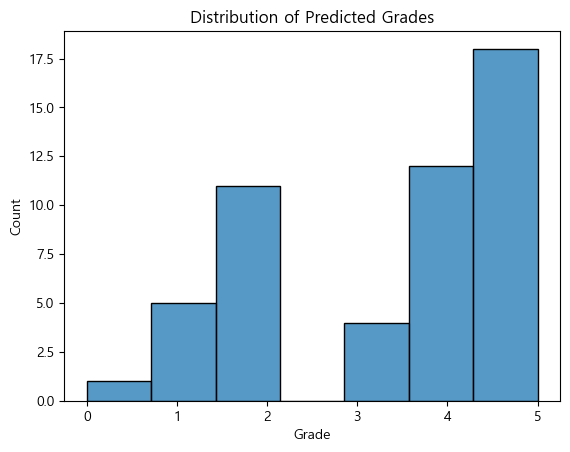

In [ ]:
# plt.figure(figsize=(8, 6))
p3 = sns.histplot(x=df_test['grade'])
plt.title('Distribution of Predicted Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

### 결과 똑같음